<a href="https://colab.research.google.com/github/Meetjain1/EDP-DFP-85-ML-Model/blob/main/DFP_85_ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

np.random.seed(42)

n_samples = 100
sensor_data = pd.DataFrame({
    'GasSensor_ppm': np.random.normal(120, 20, n_samples),
    'ForceSensor_N': np.random.normal(60, 10, n_samples),
    'Temperature_C': np.random.normal(80, 5, n_samples),
    'WheelSpeed_kmph': np.random.normal(40, 8, n_samples)
})

sensor_data.to_csv('sensor_data.csv', index=False)


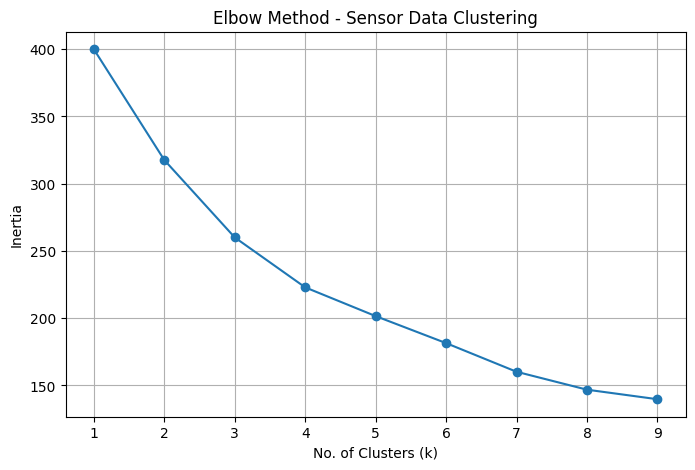

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Load and clean the sensor data
df = pd.read_csv("sensor_data.csv")

# Drop any nulls (none should exist in synthetic data)
df.dropna(inplace=True)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Determine optimal number of clusters (Elbow method)
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel("No. of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method - Sensor Data Clustering")
plt.grid(True)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

# Create synthetic S, O, D values using domain-inspired logic
df['S'] = ((df['GasSensor_ppm'] * 0.6) + (df['ForceSensor_N'] * 0.4)) / 20  # Scale to ~1-10
df['O'] = (100 - df['WheelSpeed_kmph']) / 10  # Inverse relation
df['D'] = np.abs(df['Temperature_C'] - df['Temperature_C'].mean()) / 2  # Deviation from normal

# Clip to 1-10 range
df['S'] = df['S'].clip(1, 10).round(1)
df['O'] = df['O'].clip(1, 10).round(1)
df['D'] = df['D'].clip(1, 10).round(1)


<ipython-input-4-66c30253efeb>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MSE', data=pd.DataFrame(results[target]), ax=axes[0], palette="Blues_d")
<ipython-input-4-66c30253efeb>:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=30)
<ipython-input-4-66c30253efeb>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R2', data=pd.DataFrame(results[target]), ax=axes[1], palette="Greens_d")
<ipython-input-4-66c30253efeb>:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_tic

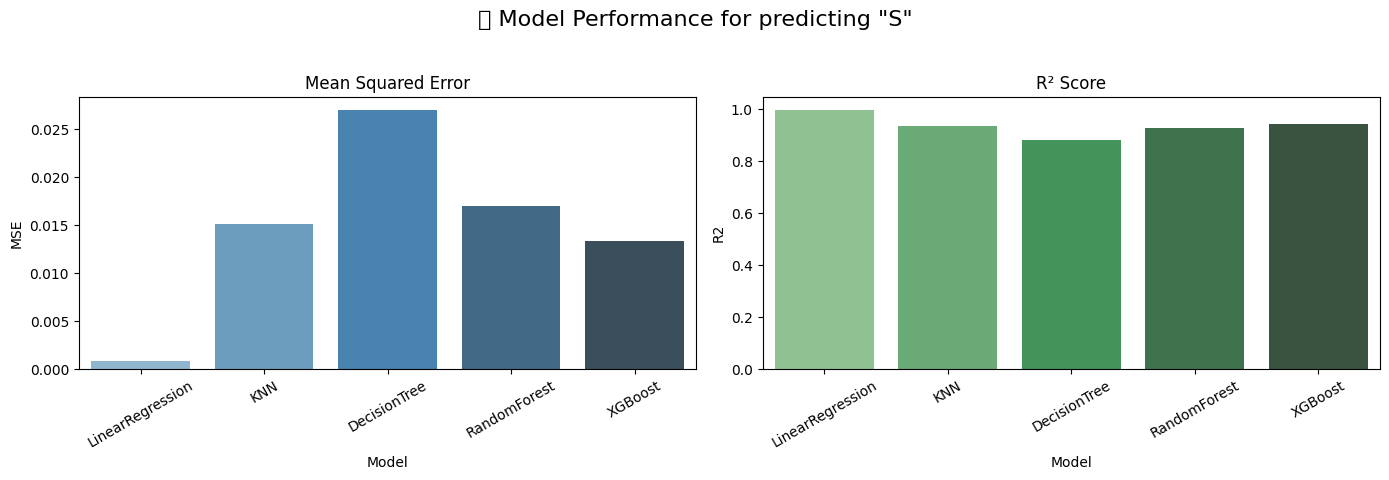

<ipython-input-4-66c30253efeb>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MSE', data=pd.DataFrame(results[target]), ax=axes[0], palette="Blues_d")
<ipython-input-4-66c30253efeb>:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=30)
<ipython-input-4-66c30253efeb>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R2', data=pd.DataFrame(results[target]), ax=axes[1], palette="Greens_d")
<ipython-input-4-66c30253efeb>:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_tic

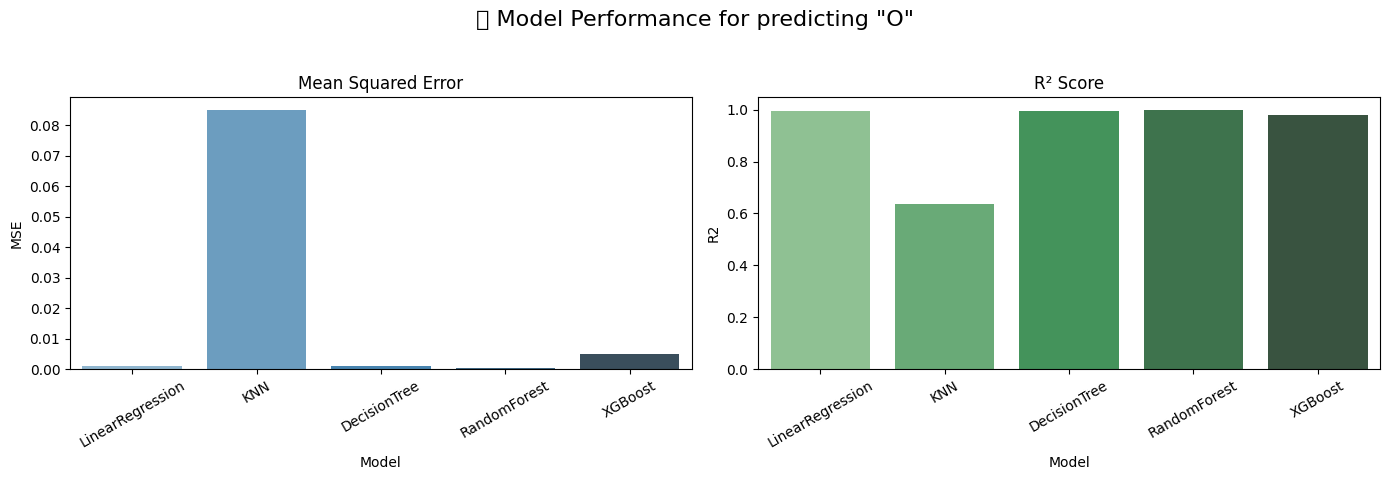

<ipython-input-4-66c30253efeb>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MSE', data=pd.DataFrame(results[target]), ax=axes[0], palette="Blues_d")
<ipython-input-4-66c30253efeb>:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=30)
<ipython-input-4-66c30253efeb>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R2', data=pd.DataFrame(results[target]), ax=axes[1], palette="Greens_d")
<ipython-input-4-66c30253efeb>:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_tic

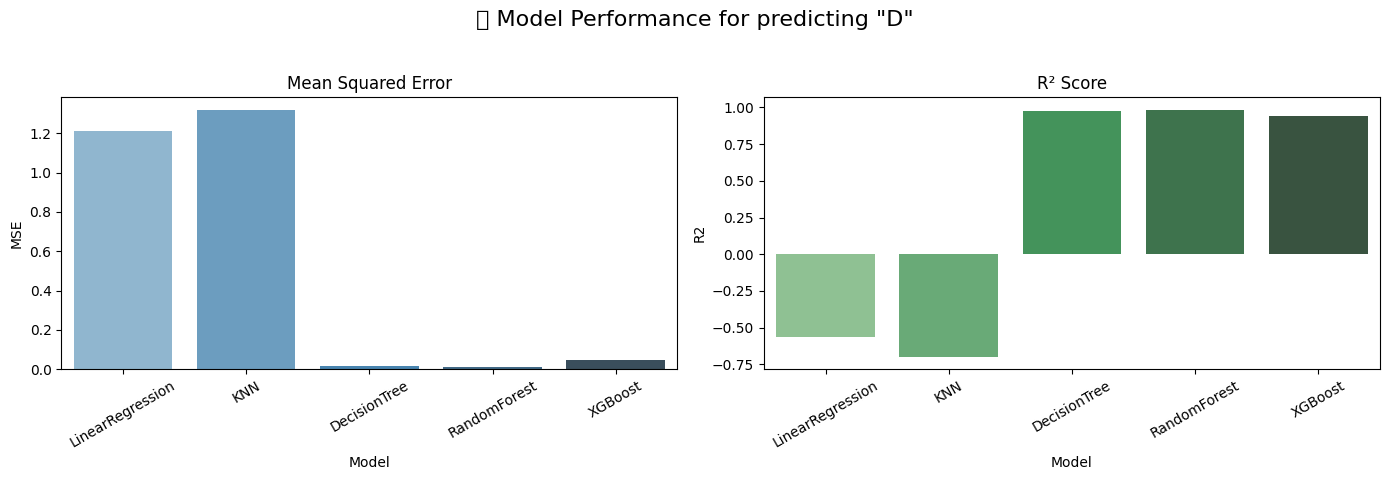

Saved sensor data with S, O, D values to sensor_data_with_sod.csv


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'df' is your DataFrame and it already contains the required sensor data

# Ensure 'S', 'O', and 'D' columns exist in your DataFrame
if 'S' not in df.columns or 'O' not in df.columns or 'D' not in df.columns:
    print("Columns 'S', 'O', or 'D' are missing from the DataFrame.")
    # You need to either generate or load these columns into your DataFrame here.
    # For example, creating some dummy values or loading them from an external file.
    # df['S'], df['O'], df['D'] = [some_data_for_S], [some_data_for_O], [some_data_for_D]
    # Or simply raise an error if these columns are critical for your analysis:
    raise ValueError("Columns 'S', 'O', or 'D' are missing from the DataFrame. Please check your data.")

# Split features and targets
X = df[['GasSensor_ppm', 'ForceSensor_N', 'Temperature_C', 'WheelSpeed_kmph']]
targets = ['S', 'O', 'D']

# Define models
models = {
    'LinearRegression': LinearRegression(),
    'KNN': KNeighborsRegressor(),
    'DecisionTree': DecisionTreeRegressor(random_state=42),
    'RandomForest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(verbosity=0, random_state=42)
}

results = {}

# Evaluate and store results
for target in targets:
    X_train, X_test, y_train, y_test = train_test_split(X, df[target], test_size=0.2, random_state=42)
    results[target] = {'Model': [], 'MSE': [], 'R2': []}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results[target]['Model'].append(name)
        results[target]['MSE'].append(mse)
        results[target]['R2'].append(r2)

# Plot the results
for target in targets:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    fig.suptitle(f'📈 Model Performance for predicting "{target}"', fontsize=16)

    sns.barplot(x='Model', y='MSE', data=pd.DataFrame(results[target]), ax=axes[0], palette="Blues_d")
    axes[0].set_title("Mean Squared Error")
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=30)

    sns.barplot(x='Model', y='R2', data=pd.DataFrame(results[target]), ax=axes[1], palette="Greens_d")
    axes[1].set_title("R² Score")
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=30)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Save the DataFrame with the 'S', 'O', 'D' values to a CSV file
df.to_csv("sensor_data_with_sod.csv", index=False)
print("Saved sensor data with S, O, D values to sensor_data_with_sod.csv")


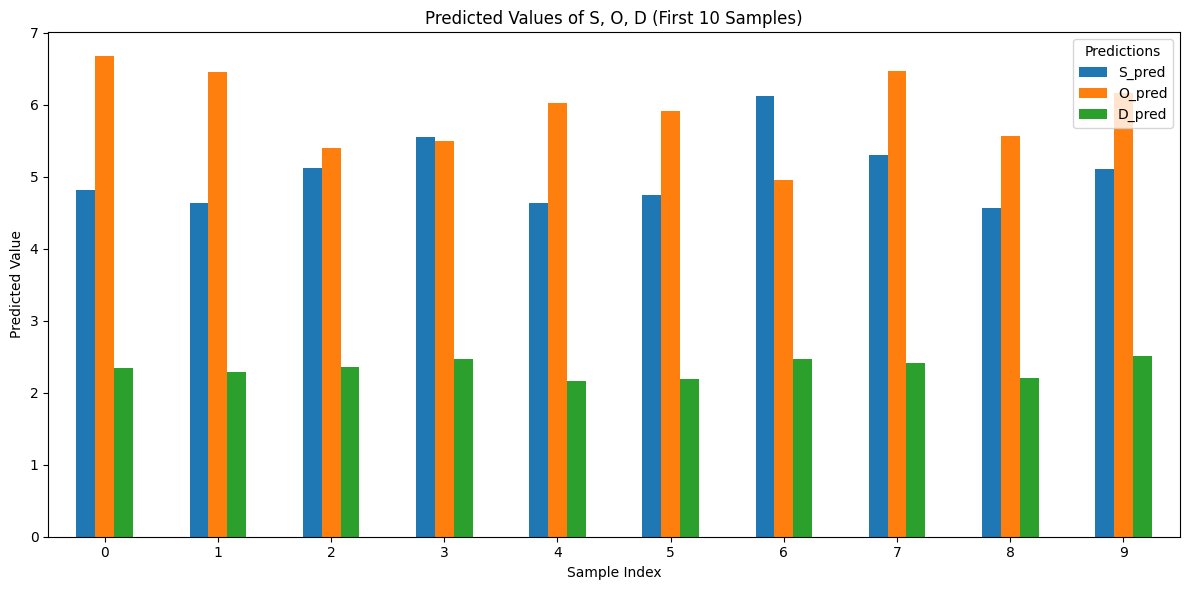

<ipython-input-5-0a2356d733a6>:48: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


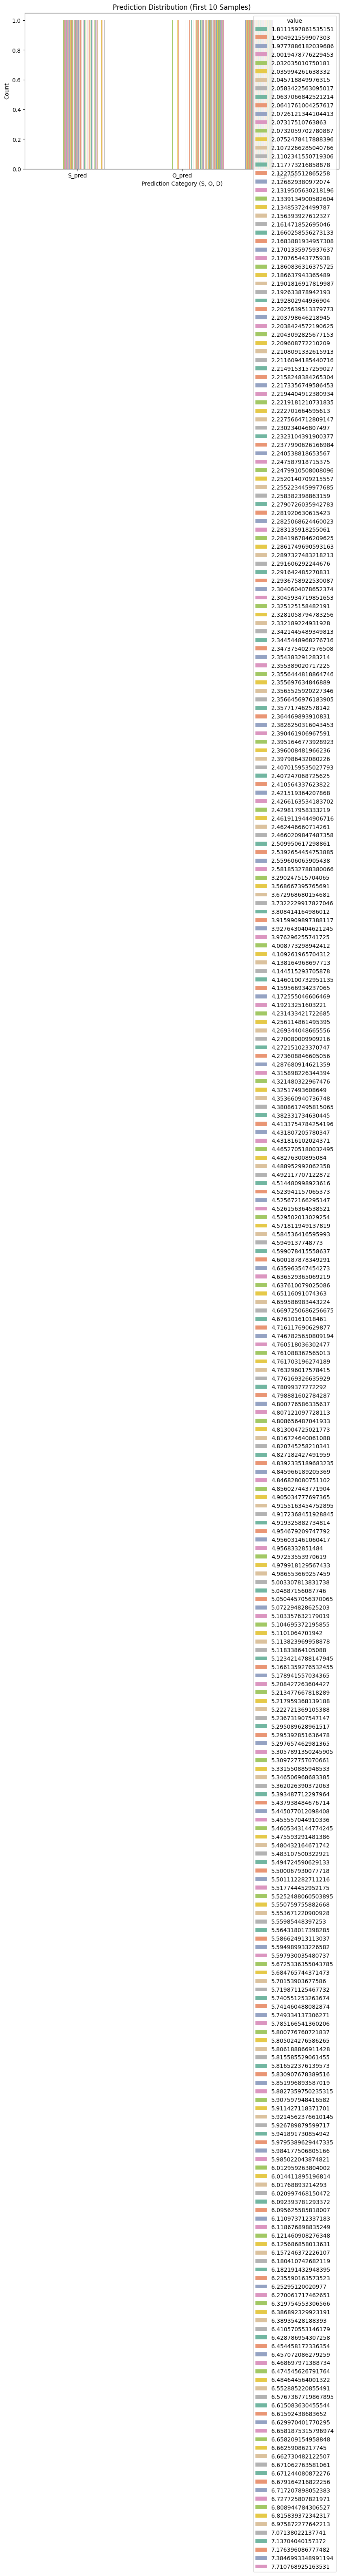

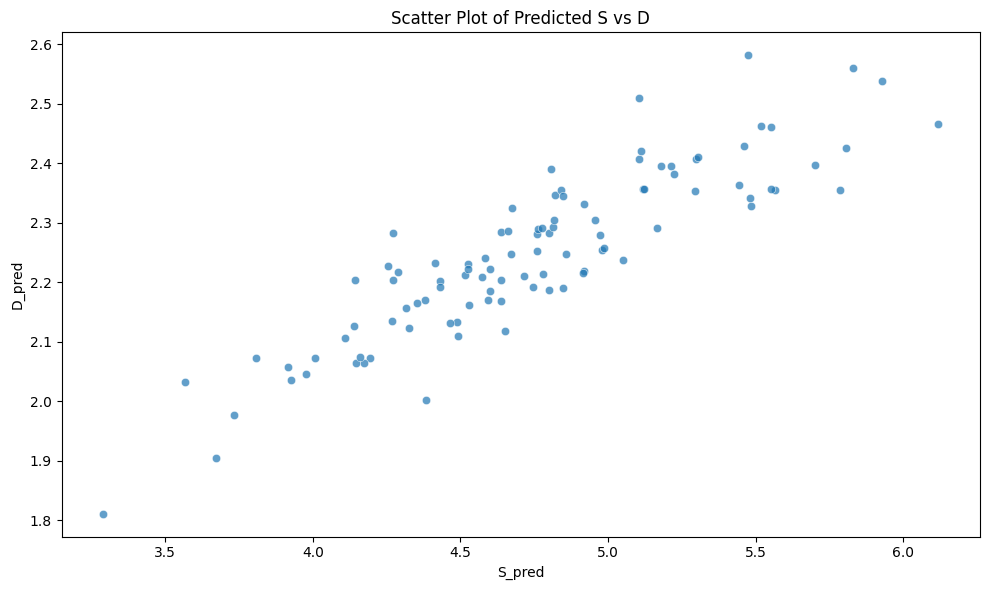

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Load the dataset
df = pd.read_csv('sensor_data_with_sod.csv')

# Check if 'S', 'O', 'D' exist and train models for predictions
if 'S' in df.columns and 'O' in df.columns and 'D' in df.columns:
    # Define features (X) from available columns
    X = df[['GasSensor_ppm', 'ForceSensor_N', 'Temperature_C', 'WheelSpeed_kmph']]  # Replace with actual columns

    # Train models for S, O, and D predictions
    model_S = LinearRegression()
    model_O = LinearRegression()
    model_D = LinearRegression()

    # Fit models on the actual data
    model_S.fit(X, df['S'])
    model_O.fit(X, df['O'])
    model_D.fit(X, df['D'])

    # Make predictions
    df['S_pred'] = model_S.predict(X)
    df['O_pred'] = model_O.predict(X)
    df['D_pred'] = model_D.predict(X)

    # Sample predictions (first 10 rows)
    sample_df = df[['S_pred', 'O_pred', 'D_pred']].head(10)

    # Plot S, O, D predictions for the first 10 samples
    sample_df[['S_pred', 'O_pred', 'D_pred']].plot(kind='bar', figsize=(12, 6))
    plt.title('Predicted Values of S, O, D (First 10 Samples)')
    plt.xlabel('Sample Index')
    plt.ylabel('Predicted Value')
    plt.xticks(rotation=0)
    plt.legend(title='Predictions')
    plt.tight_layout()
    plt.show()

    # Count plot of each predicted value (S, O, D) in the first 10 samples
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df[['S_pred', 'O_pred', 'D_pred']].melt(), x='variable', hue='value', palette='Set2')
    plt.title('Prediction Distribution (First 10 Samples)')
    plt.xlabel('Prediction Category (S, O, D)')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

    # Optional Scatter: Visualizing S vs D predictions
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='S_pred', y='D_pred', alpha=0.7)
    plt.title('Scatter Plot of Predicted S vs D')
    plt.xlabel('S_pred')
    plt.ylabel('D_pred')
    plt.tight_layout()
    plt.show()

    # Save the updated DataFrame with predictions to CSV (optional)
    df.to_csv('sensor_data_with_predictions.csv', index=False)
else:
    raise ValueError("Columns 'S', 'O', or 'D' are missing from the CSV.")


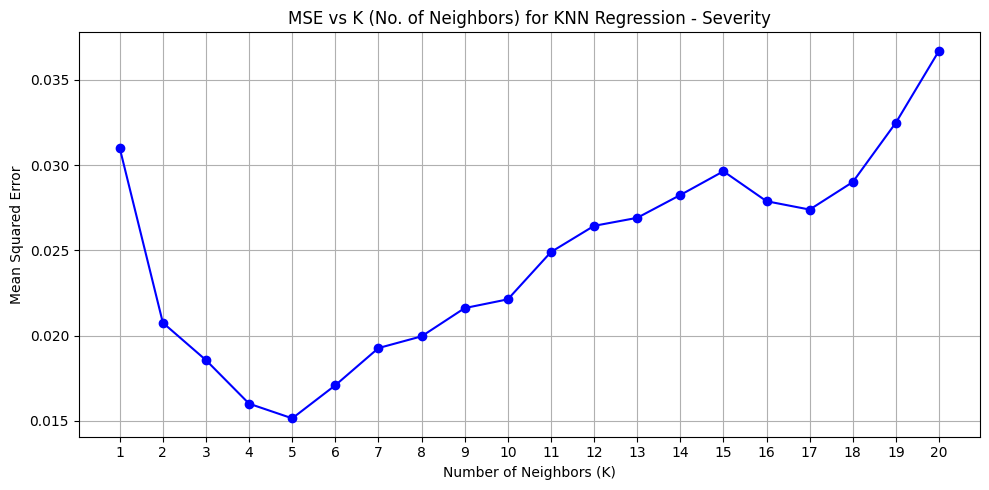

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load the cleaned and feature-engineered data
data = pd.read_csv("sensor_data_with_sod.csv")  # This should include 'S', 'O', 'D' columns now

# Features and Target for example (Severity)
X = data[['GasSensor_ppm', 'Temperature_C', 'ForceSensor_N', 'WheelSpeed_kmph']]
y = data['S']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check different K values
k_values = list(range(1, 21))
mse_values = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Plotting MSE vs K
plt.figure(figsize=(10, 5))
plt.plot(k_values, mse_values, marker='o', linestyle='-', color='blue')
plt.title("MSE vs K (No. of Neighbors) for KNN Regression - Severity")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.xticks(k_values)
plt.tight_layout()
plt.show()


<ipython-input-7-0d0ac12a9fff>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Model', y='MSE', ax=axes[0], palette='Set2')
<ipython-input-7-0d0ac12a9fff>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Model', y='R²', ax=axes[1], palette='Set1')


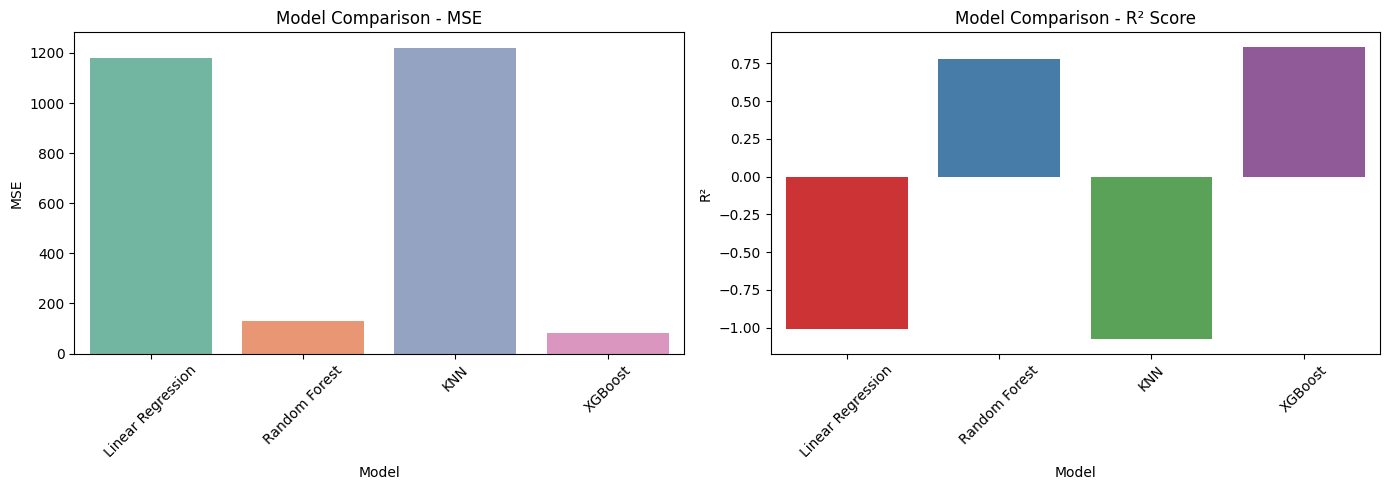

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
data = pd.read_csv("sensor_data_with_sod.csv")

# Calculate RPN
data['RPN'] = data['S'] * data['O'] * data['D']

# Features and Target
X = data[['GasSensor_ppm', 'ForceSensor_N', 'Temperature_C', 'WheelSpeed_kmph']]
y = data['RPN']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "KNN": KNeighborsRegressor(),
    "XGBoost": XGBRegressor(objective='reg:squarederror', random_state=42)
}

# Evaluate
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    results[name] = {"MSE": mse, "R²": r2}

# Plotting
results_df = pd.DataFrame(results).T.reset_index().rename(columns={'index': 'Model'})
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.barplot(data=results_df, x='Model', y='MSE', ax=axes[0], palette='Set2')
axes[0].set_title('Model Comparison - MSE')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(data=results_df, x='Model', y='R²', ax=axes[1], palette='Set1')
axes[1].set_title('Model Comparison - R² Score')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
data = pd.read_csv("sensor_data_with_sod.csv")

# Calculate RPN
data['RPN'] = data['S'] * data['O'] * data['D']

# Features and Target
X = data[['GasSensor_ppm', 'ForceSensor_N', 'Temperature_C', 'WheelSpeed_kmph']]
y = data['RPN']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest (Assumed Best)
best_model = RandomForestRegressor(random_state=42)
best_model.fit(X_train, y_train)

# Predict on test set
y_pred_rpn = best_model.predict(X_test)

# Save actual vs predicted RPN for plotting
rpn_comparison = pd.DataFrame({
    'Actual RPN': y_test.values,
    'Predicted RPN': y_pred_rpn
})

print("Sample of Predicted vs Actual RPN:")
print(rpn_comparison.head())


Sample of Predicted vs Actual RPN:
   Actual RPN  Predicted RPN
0      97.152      114.57715
1      76.128       71.00025
2      97.920      125.06775
3      26.100       27.48182
4      81.920      109.49118


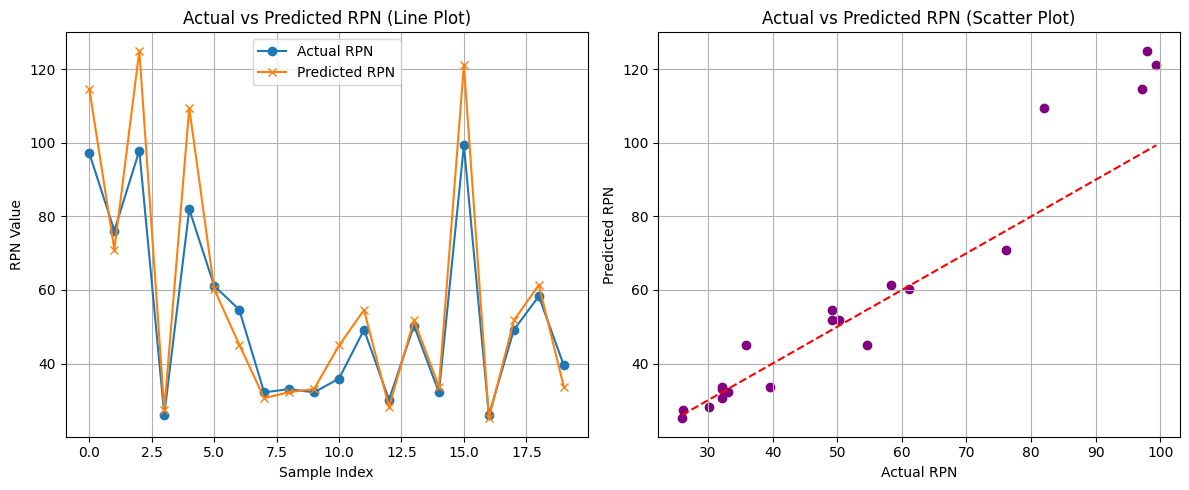

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'rpn_comparison' DataFrame is from Step 6
# You can reload it if running separately
# rpn_comparison = pd.read_csv("rpn_comparison.csv")

# Line Plot: Actual vs Predicted RPN
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(rpn_comparison['Actual RPN'].values, label='Actual RPN', marker='o')
plt.plot(rpn_comparison['Predicted RPN'].values, label='Predicted RPN', marker='x')
plt.title("Actual vs Predicted RPN (Line Plot)")
plt.xlabel("Sample Index")
plt.ylabel("RPN Value")
plt.legend()
plt.grid(True)

# Scatter Plot: Actual vs Predicted RPN
plt.subplot(1, 2, 2)
plt.scatter(rpn_comparison['Actual RPN'], rpn_comparison['Predicted RPN'], color='purple')
plt.plot([rpn_comparison['Actual RPN'].min(), rpn_comparison['Actual RPN'].max()],
         [rpn_comparison['Actual RPN'].min(), rpn_comparison['Actual RPN'].max()],
         color='red', linestyle='--')
plt.title("Actual vs Predicted RPN (Scatter Plot)")
plt.xlabel("Actual RPN")
plt.ylabel("Predicted RPN")
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

def classify_failure(s, o, d):
    # Logic-based classification
    if s > 7 and o > 6:
        return "Piston", "Gas leakage or piston jam"
    elif s < 3 and o < 3 and d > 6:
        return "Raspberry Pi", "Signal loss"
    elif s > 7 and d < 4:
        return "Sensor", "Inaccurate sensor due to noise"
    elif o > 7 and s > 5:
        return "Solenoid Valve", "Valve stuck, no control over airflow"
    else:
        return "General", "Minor disturbance or unknown"

def get_gemini_suggestion(failure_mode):
    # Simulated Gemini suggestion
    responses = {
        "Gas leakage or piston jam": "Ensure piston alignment and seal integrity. Clean and lubricate for smoother operation.",
        "Signal loss": "Check Raspberry Pi connections and reboot. Ensure proper power supply and watchdog timer.",
        "Inaccurate sensor due to noise": "Use shielded cables and apply digital filters. Check sensor calibration.",
        "Valve stuck, no control over airflow": "Inspect valve solenoid coil and power. Clean the valve seat from debris.",
        "Minor disturbance or unknown": "Run diagnostics to isolate the fault. Monitor sensors over time for anomaly patterns."
    }
    return responses.get(failure_mode, "No suggestion found.")

# Assuming the best model predicted RPN values in 'y_pred_rpn' and test set features in 'X_test'

# Combine the actual RPN values with predicted RPN
rpn_comparison = pd.DataFrame({
    'Actual RPN': y_test.values,
    'Predicted RPN': y_pred_rpn
})

# Find the row with highest predicted RPN
max_rpn_row = rpn_comparison.loc[rpn_comparison['Predicted RPN'].idxmax()]

# Get corresponding sensor values for highest RPN
max_s = X_test.iloc[max_rpn_row.name]['GasSensor_ppm']
max_o = X_test.iloc[max_rpn_row.name]['ForceSensor_N']
max_d = X_test.iloc[max_rpn_row.name]['Temperature_C']

# Classify the failure mode for the highest RPN
component, fault = classify_failure(max_s, max_o, max_d)

# Get Gemini cure suggestion
suggestion = get_gemini_suggestion(fault)

# Display results
print(f"Failure Component: {component}")
print(f"Failure Mode: {fault}")
print(f"Cure Suggestion: {suggestion}")


Failure Component: Piston
Failure Mode: Gas leakage or piston jam
Cure Suggestion: Ensure piston alignment and seal integrity. Clean and lubricate for smoother operation.
